## Functions

In [1]:
data=[40, 50, 50]


function counts(data)
    d = Dict{Int, Int}()
    for element in data
        if haskey(d, element)
            d[element]+=1
        else 
            d[element]=1
        end 
    end
    return d
    println(d)
            
end

counts (generic function with 1 method)

In [2]:
vv = [1, 0, 1, 0, 1000, 1, 1, 1000]

8-element Array{Int64,1}:
    1
    0
    1
    0
 1000
    1
    1
 1000

In [3]:
v=counts(vv)

Dict{Int64,Int64} with 3 entries:
  0    => 2
  1000 => 2
  1    => 4

In [4]:
ks=collect(keys(v))

3-element Array{Int64,1}:
    0
 1000
    1

In [5]:
vs=collect(values(v))

3-element Array{Int64,1}:
 2
 2
 4

In [6]:
p=sortperm(ks)

3-element Array{Int64,1}:
 1
 3
 2

In [7]:
ks[p]

3-element Array{Int64,1}:
    0
    1
 1000

In [8]:
function countsnew(data)
    d = Dict{Int, Int}()
    for element in data
        if haskey(d, element)
            d[element]+=1
        else 
            d[element]=1
        end 
    end
    ks=collect(keys(d))
    vs=collect(values(d))
    p=sortperm(ks)
    
    return ks[p], vs[p]
    
            
end

countsnew (generic function with 1 method)

In [9]:
vv = [1, 0, 1, 0, 1000, 1, 1, 1000]

8-element Array{Int64,1}:
    1
    0
    1
    0
 1000
    1
    1
 1000

In [10]:
countsnew(vv)

([0, 1, 1000], [2, 4, 2])

In [11]:
function probability_distribution(results)
    keys=results[1]
    values=results[2]
    valuessum=sum(values)
    valuesnew=results[2]./valuessum
    return keys, valuesnew
end

probability_distribution (generic function with 1 method)

In [12]:
pdistribution=probability_distribution(countsnew(vv))

([0, 1, 1000], [0.25, 0.5, 0.25])

In [13]:
sumofvalues=sum(pdistribution[2])

1.0

In [14]:
function bernoulli(p)
   r=rand() 
    if p > r
        return true
    else 
        return false
    end
end

bernoulli (generic function with 1 method)

In [15]:
function geometric(p)
   
    n=1
    while (bernoulli(p)==false)
        n=n+1
    end
    τ=n
    return τ
end

geometric (generic function with 1 method)

In [16]:
geometric(0.05)

33

In [17]:
function experiment(p, N)
    rctimes=Int[]
    for time in 1:N
        push!(rctimes, geometric(p))
    end
    return rctimes
end

experiment (generic function with 1 method)

In [18]:
exp=experiment(0.25, 10000)

10000-element Array{Int64,1}:
 4
 3
 1
 3
 1
 1
 5
 1
 3
 1
 3
 2
 1
 ⋮
 2
 3
 2
 6
 9
 9
 1
 9
 6
 3
 2
 4

In [19]:
countsexp=countsnew(exp)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  21, 22, 24, 25, 26, 27, 28, 29, 30, 38], [2523, 1832, 1452, 1008, 807, 607, 438, 327, 261, 194  …  8, 4, 3, 3, 2, 2, 1, 1, 2, 1])

In [20]:
pd=probability_distribution(countsexp)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  21, 22, 24, 25, 26, 27, 28, 29, 30, 38], [0.2523, 0.1832, 0.1452, 0.1008, 0.0807, 0.0607, 0.0438, 0.0327, 0.0261, 0.0194  …  0.0008, 0.0004, 0.0003, 0.0003, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001])

In [21]:
function get_probability(p, N)
     exp=experiment(p, N)
     countsexp=countsnew(exp)
     pd=probability_distribution(countsexp)
     return pd
end

get_probability (generic function with 1 method)

## Probability distributions

In [22]:
using Plots

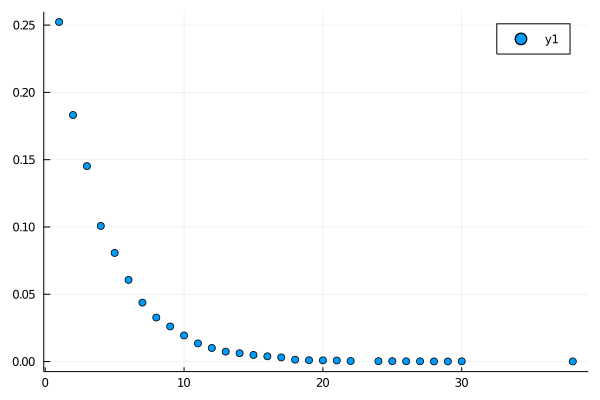

In [23]:
scatter(pd[1], pd[2])

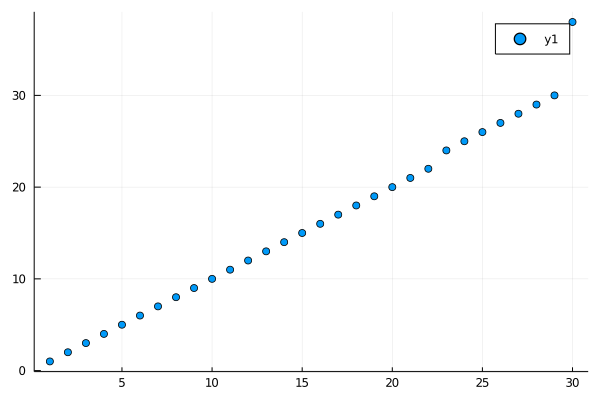

In [24]:
scatter(pd[1])

In [25]:
function mean(data)
    count=0
    sum=0
    for element in data
        sum=sum+element
        count+=1
    end
    if count==0 || sum==0
        return nothing 
    else 
        mean=sum/count
        return mean
    end
    
end

mean (generic function with 1 method)

In [26]:
mn=mean(countsexp[1])

16.0

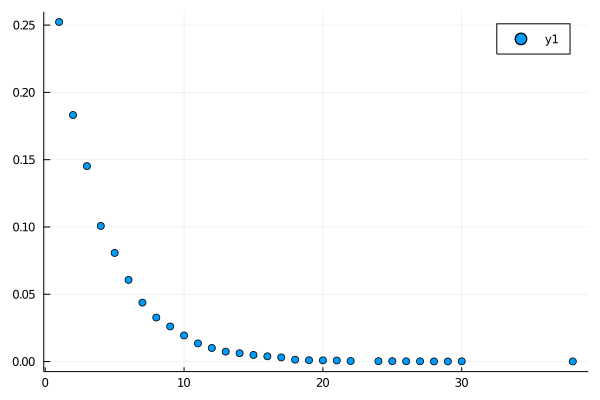

In [27]:
scatter(pd[1], pd[2])

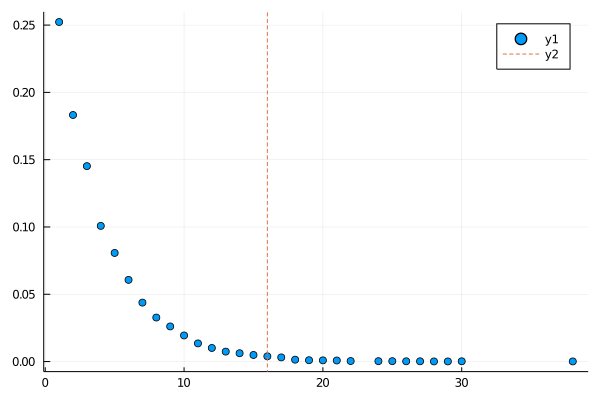

In [28]:
myarray=[mn]
vline!(myarray, ls=:dash)


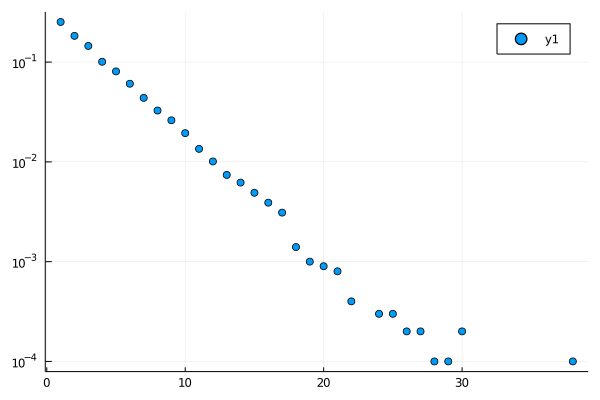

In [29]:
scatter(pd[1], pd[2], yscale=:log10)

In [30]:
using Interact

@manipulate for p in 0:0.01:1
     @manipulate for N in 0:10^5
        exp=experiment(p, N)
        countsexp=countsnew(exp)
        
        pd=probability_distribution(countsexp)
        scatter(pd[1], pd[2])
        xlims!(0, 100)
        ylims!(0, 1)
    end
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17187851954980929819\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-901181473802556219\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17187851954980929819\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["p"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000002bc41710, Task (runnable) @0x000000002bc41710), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",

In [31]:
means=Float64[]
probabilities=Float64[]
   
for p in 1:100
   p=p/100
    push!(probabilities, p)
   N=10000
   exp=experiment(p, N)
   countsexp=countsnew(exp)
   mn=mean(countsexp[1])
   push!(means, mn)
end
probabilities
    


100-element Array{Float64,1}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 ⋮
 0.89
 0.9
 0.91
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0

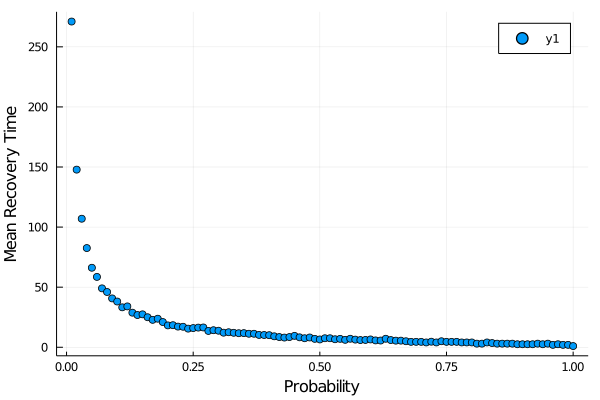

In [32]:
scatter(probabilities, means)
xlabel!("Probability")
ylabel!("Mean Recovery Time")

## Probabilities 

In [33]:
function new_geometric(p)
    Pn=Float64[]
    days=Int64[]
    for n in 1:50
       pn=p*(1-p)^(n-1)
       push!(Pn, pn) 
       push!(days, n) 
    end
    return Pn, days
end

gp=new_geometric(0.25)
Pn=gp[1]
days=gp[2]

50-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 39
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50

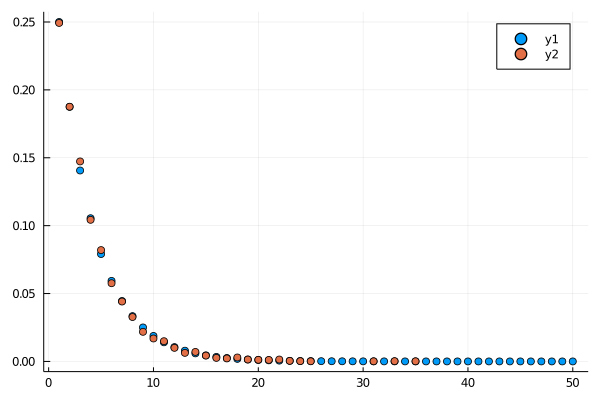

In [34]:
pd=get_probability(0.25, 10000)
scatter(days, Pn)
scatter!(pd[1], pd[2])


In [35]:
Pn


50-element Array{Float64,1}:
 0.25
 0.1875
 0.140625
 0.10546875
 0.0791015625
 0.059326171875
 0.04449462890625
 0.0333709716796875
 0.025028228759765625
 0.01877117156982422
 0.014078378677368164
 0.010558784008026123
 0.007919088006019592
 ⋮
 4.4695934051722205e-6
 3.3521950538791656e-6
 2.514146290409374e-6
 1.8856097178070307e-6
 1.4142072883552728e-6
 1.0606554662664548e-6
 7.95491599699841e-7
 5.966186997748808e-7
 4.474640248311606e-7
 3.3559801862337043e-7
 2.5169851396752785e-7
 1.8877388547564587e-7

In [36]:
sum(Pn)

0.9999994336783435

In [37]:
gp[2]

50-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 39
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50

In [38]:
function day_frecuency(N=10000)
    gp=new_geometric(0.25)
    Pn=gp[1]
    days=gp[2]
    vector=Float64[]
    rnum=Float64[]
    for number in 1:N
        r=rand()
        for n in days 
           s=sum(Pn[1:n])
            if r <s
                push!(vector, n)
                push!(rnum, r)
                break

            else 
                continue
            end
        end
    end
    
    
    return vector, rnum
end

day_frecuency (generic function with 2 methods)

In [39]:
function days_sum()
   data=day_frecuency() 
    days=data[1]
   counts=countsnew(days) 
    return counts
end


days_sum (generic function with 1 method)

In [40]:
data=days_sum()

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  20, 21, 22, 23, 24, 25, 27, 28, 31, 32], [2483, 1951, 1381, 1005, 740, 633, 449, 378, 249, 191  …  8, 4, 4, 6, 4, 6, 3, 1, 1, 1])

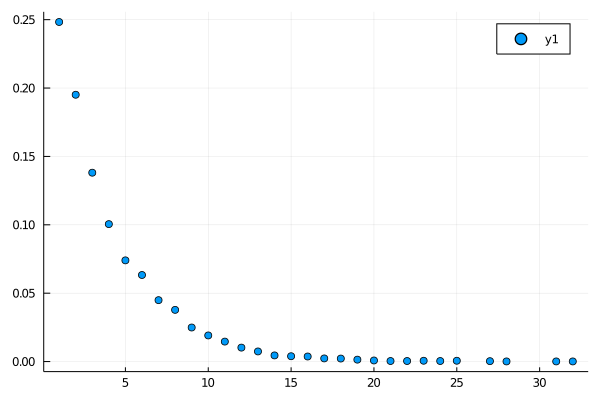

In [41]:
scatter(data[1], data[2]./sum(data[2]))

In [42]:
function accumulative_sum(p)
    gp=new_geometric(0.25)
    Pn=gp[1]
    sumv=[Pn[1]]
    for n in 2:length(Pn)
        newn=sumv[n-1] + Pn[n]
        push!(sumv, newn)
    end
    return sumv
end

accumulative_sum (generic function with 1 method)

In [43]:
psum=accumulative_sum(0.25)

50-element Array{Float64,1}:
 0.25
 0.4375
 0.578125
 0.68359375
 0.7626953125
 0.822021484375
 0.86651611328125
 0.8998870849609375
 0.9249153137207031
 0.9436864852905273
 0.9577648639678955
 0.9683236479759216
 0.9762427359819412
 ⋮
 0.9999865912197843
 0.9999899434148382
 0.9999924575611285
 0.9999943431708463
 0.9999957573781347
 0.999996818033601
 0.9999976135252007
 0.9999982101439004
 0.9999986576079253
 0.9999989932059439
 0.9999992449044578
 0.9999994336783433

In [44]:
y_coordinate=zeros(50)

50-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

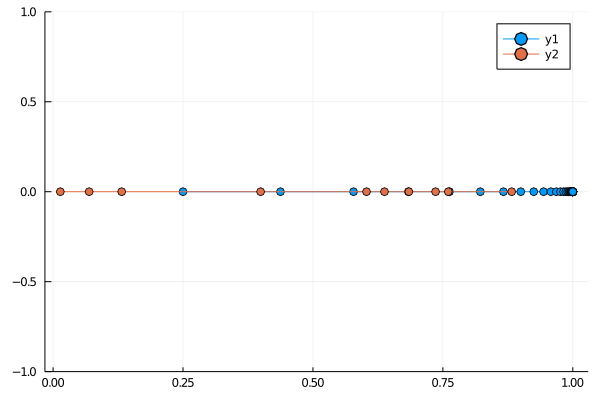

In [45]:
exp= day_frecuency(10)
rn=exp[2]
y_c=zeros(10);
plot(psum, y_coordinate, m=:o)
ylims!(-1, 1)
plot!(rn, y_c, m=:o)

In [46]:
calvector=Float64[]
e=MathConstants.e
for i in 0:30
    cal=0.25*e^(-0.25*i)
    push!(calvector, cal)
end

In [47]:
calvector

31-element Array{Float64,1}:
 0.25
 0.19470019576785122
 0.15163266492815836
 0.11809163818525367
 0.09196986029286058
 0.07162619921504752
 0.055782540037107455
 0.04344348586261128
 0.033833820809153176
 0.026349806140466083
 0.0205212496559747
 0.015981965301676893
 0.012446767091965986
 ⋮
 0.0021629238007801585
 0.0016844867497713668
 0.001311879599795346
 0.0010216928596160166
 0.0007956951991274167
 0.0006196880441665896
 0.0004826135340569273
 0.0003758597982443931
 0.0002927199051977936
 0.00022797049138862906
 0.00017754359721063728
 0.0001382710925369584

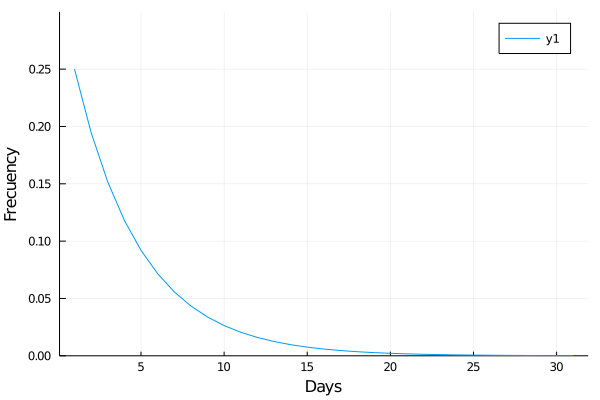

In [48]:
plot(calvector)
ylims!(0, 0.30)
xlabel!("Days")
ylabel!("Frecuency")

$$Area=\int_0^\infty 0.25 e^{-0.25x} \,dx= 1$$

In [49]:
function day_frecuency_2(N=10000)
    gp=new_geometric(0.25)
    Pn=gp[1]
    days=gp[2]
    vector=Float64[]
    for number in 1:N
        r=rand()
        for n in days 
           s=sum(Pn[1:n])
            if r <= s
                push!(vector, n)
                
                break

            else 
                continue
            end
        end
    end
    
    
    return vector
end

day_frecuency_2 (generic function with 2 methods)

In [50]:
nfallenbins=day_frecuency_2(100)

100-element Array{Float64,1}:
  3.0
  1.0
  4.0
  1.0
  1.0
  1.0
  2.0
  3.0
 16.0
  7.0
  2.0
  2.0
  1.0
  ⋮
  3.0
  2.0
 12.0
  1.0
  3.0
  1.0
  6.0
  2.0
 13.0
  4.0
  5.0
  2.0

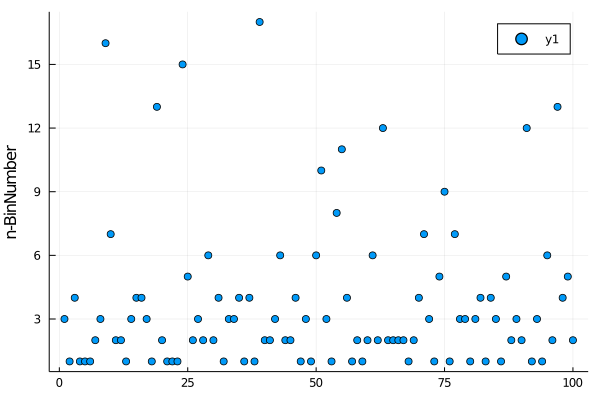

In [51]:
scatter!();
scatter(nfallenbins)
ylabel!("n-BinNumber")

## Infection Model

$state \ S: susceptible$\
$state \ E: exposed$\
$state  \ I: infectious$

$PE: probability\ to\ become\ exposed$\
$PI: probability\ to\ become\ infectious$\
$PR: probability\ to\ recover$


In [52]:
function total_time(p_E, p_I, p_R)
    
    state="S"
    
    T_S=0
    T_E=0
    T_I=0
    T_total=0
    
    if state == "S"
       T_S= geometric(p_E)
       state="E"
    end
    if state =="E"
        T_E=geometric(p_I)
        state="I"
    end
    if state == "I"
        T_I=geometric(p_R)
        state="Recovered"
    end
    if state == "Recovered"
        T_total=T_S + T_E + T_I
    end
    return T_total            
end
                
                

total_time (generic function with 1 method)

In [53]:
function Monte_Carlo(p_E, p_I, p_R, N=10000)
    
    t_time=Float64[]
    for i in 1:N
        time=total_time(p_E, p_I, p_R)
        push!(t_time, time)
    end
    count=countsnew(t_time)
    pd=probability_distribution(count)
    return pd
end

Monte_Carlo (generic function with 2 methods)

In [54]:
p_E=0.25
p_I=0.1
p_R=0.05

pd=Monte_Carlo(p_E, p_I, p_R, 10000)

([3, 4, 5, 6, 7, 8, 9, 10, 11, 12  …  150, 151, 153, 157, 164, 168, 180, 181, 183, 204], [0.001, 0.0036, 0.0069, 0.0078, 0.0113, 0.0135, 0.0154, 0.015, 0.0181, 0.0191  …  0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001])

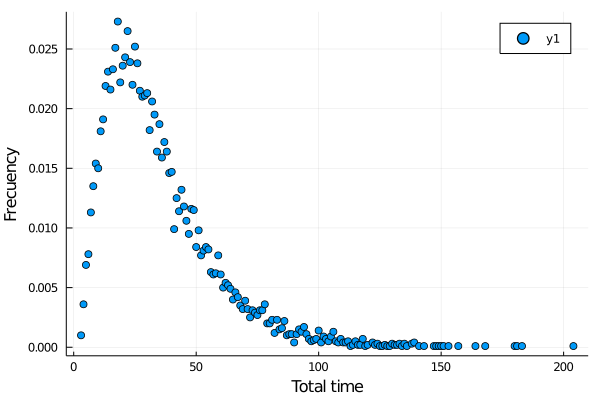

In [55]:
scatter(pd)
xlabel!("Total time")
ylabel!("Frecuency")

In [56]:
function total_time_2(p)
    
    state="S"
    
    T_S=0
    T_E=0
    T_E_1=0
    T_E_2=0
    T_I=0
    T_total=0
    
    if state == "S"
       T_S= geometric(p)
       state="E"
    end
    if state =="E"
        T_E=geometric(p)
        state="E_1"
    end
    if state =="E_1"
        T_E_1=geometric(p)
        state="E_2"
    end
    if state =="E_2"
        T_E_2=geometric(p)
        state="I"
    end
    if state == "I"
        T_I=geometric(p)
        state="Recovered"
    end
    if state == "Recovered"
        T_total=T_S + T_E + T_E_1 + T_E_2 + T_I
    end
    return T_total            
end

total_time_2 (generic function with 1 method)

In [57]:
function Monte_Carlo_2(p, N=10000)
    
    t_time=Float64[]
    for i in 1:N
        time=total_time_2(p)
        push!(t_time, time)
    end
    count=countsnew(t_time)
    pd=probability_distribution(count)
    return pd
end

Monte_Carlo_2 (generic function with 2 methods)

In [58]:
pd2=Monte_Carlo_2(0.25, 10000)

([5, 6, 7, 8, 9, 10, 11, 12, 13, 14  …  52, 53, 54, 55, 56, 57, 58, 61, 63, 65], [0.001, 0.003, 0.0093, 0.0159, 0.0219, 0.031, 0.0337, 0.0405, 0.0487, 0.0515  …  0.0005, 0.0005, 0.0001, 0.0005, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001])

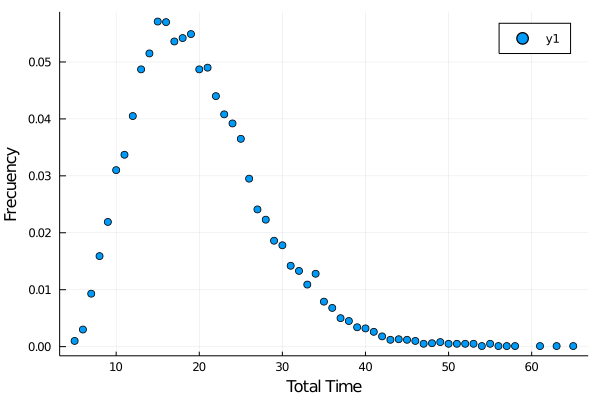

In [59]:
scatter(pd2)
xlabel!("Total Time")
ylabel!("Frecuency")

## Simulation

In [91]:
function simulation(N, p, days)

    S=zeros(N)
    S[1]=N
    E=zeros(N)
    I=zeros(N)
    R=zeros(N)
    
    
    for day in 1:days
        
        if day< (N-1)
        
        for person in 1:S[day]
            
            case=bernoulli(p)
            
            if case==false
                
                S[day+1]=S[day+1]+1
            else
                E[day+1]=E[day+1]+1
            end
            
        end
        
        if E[day]==0
            
            E[day+1]=E[day+1]+0
            
        else
            
            for person in 1:E[day]
                
                case=bernoulli(p)
                
                if case==false
                    
                    E[day+1]=E[day+1] +1
                    
                else
                    
                    I[day+1]=I[day+1]+1
                    
                end
                
            end
            
        end
        
        if E[day]==0
            
            I[day+1]=I[day+1]+0
            
        else
            
            for person in 1:I[day]
                
                case=bernoulli(p)
                
                if case==false
                    
                    I[day+1]=I[day+1]+1
                    
                else
                    
                    R[day+1]=R[day+1]+1
                    
                end
                
            end
        end
        
        
        if R[day]==0
            
            R[day+1]=R[day+1]+0
            
        else
            
            R[day+1]=R[day+1]+R[day]
            
        end
        
        end
        
    end
    
    return S, E, I, R
end

simulation (generic function with 1 method)

In [92]:
si=simulation(100, 0.25, 100)

([100.0, 73.0, 52.0, 41.0, 35.0, 26.0, 15.0, 10.0, 9.0, 7.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 27.0, 44.0, 44.0, 38.0, 38.0, 36.0, 33.0, 28.0, 22.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 13.0, 20.0, 26.0, 33.0, 36.0, 35.0, 37.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 2.0, 7.0, 10.0, 16.0, 21.0, 28.0, 34.0  …  93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 93.0, 0.0])

In [93]:
s=si[1]
e=si[2]
i=si[3]
r=si[4]

100-element Array{Float64,1}:
  0.0
  0.0
  0.0
  2.0
  7.0
 10.0
 16.0
 21.0
 28.0
 34.0
 45.0
 51.0
 55.0
  ⋮
 93.0
 93.0
 93.0
 93.0
 93.0
 93.0
 93.0
 93.0
 93.0
 93.0
 93.0
  0.0

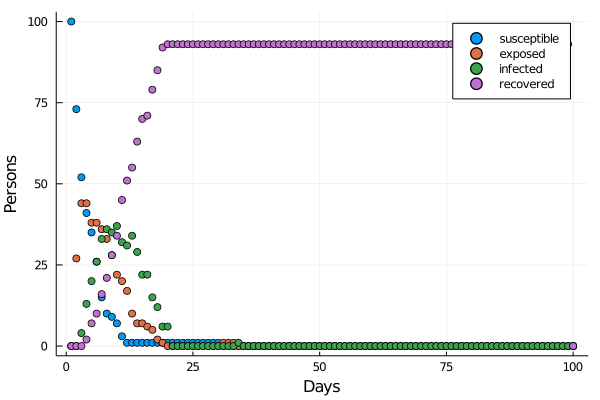

In [95]:
scatter(s, label="susceptible")
scatter!(e, label="exposed")
scatter!(i, label="infected")
scatter!(r, label="recovered")

xlabel!("Days")
ylabel!("Persons")